In [1]:
!pip install --upgrade opencv-contrib-python

In [2]:
!pip install tensorflow

In [3]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import cv2
import PIL
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Dropout , Flatten , MaxPooling2D , BatchNormalization 
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow import keras
from keras.models import Model

In [5]:
pwd


'c:\\Users\\KIIT0001\\Desktop'

In [6]:
#data path
trainpath =r'C:\Users\KIIT0001\Downloads\Rice leaf disease\train'

testpath = r'C:\Users\KIIT0001\Downloads\Rice leaf disease\test'

In [7]:
new_size=224
train_images=[]
train_labels=[]
for i in os.listdir(trainpath):#entering train folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(trainpath+'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:# reading each images
      class_riceleafdisease={'Tungro':0,'Brownspot':1,'Blast':2,'Bacterialblight':3}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      train_images.append(list(resize_image))
      train_labels.append(class_riceleafdisease[i])

Entering to the folder name: Bacterialblight
Number of images in the folder is 1333
Entering to the folder name: Blast
Number of images in the folder is 1205
Entering to the folder name: Brownspot
Number of images in the folder is 1355
Entering to the folder name: Tungro
Number of images in the folder is 1148


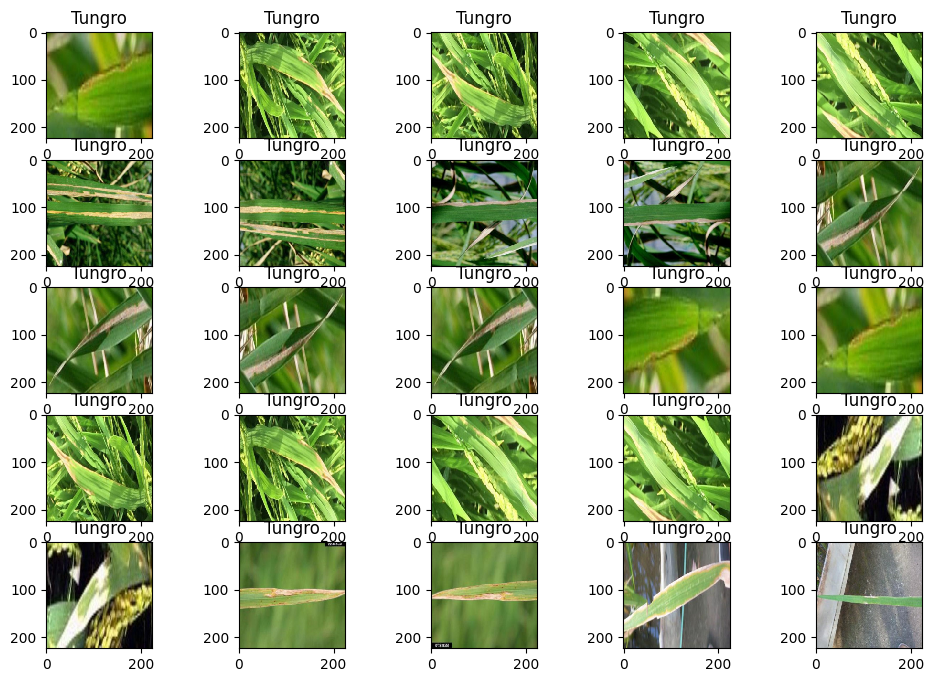

In [8]:
w = 40
h = 30
fig = plt.figure(figsize=(12, 8))
columns = 5
rows = 5

for i in range(1, columns * rows + 1):
    ax = fig.add_subplot(rows, columns, i)
    if train_labels[i] == 0:
        ax.title.set_text('BacterialBlight')
    elif train_labels[i] == 1:
        ax.title.set_text('Blast')
    elif train_labels[i] == 2:
        ax.title.set_text('BrownSpot')
    elif train_labels[i] == 3:
        ax.title.set_text('Tungro')
    plt.imshow(train_images[i], interpolation='nearest')
plt.show()

In [9]:
new_size=224
test_images=[]
test_labels=[]
for i in os.listdir(testpath):# entering to the test folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(testpath +'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:
      class_riceleafdisease={'Tungro_test':0,'brownspot_test':1,'blast_test':2,'Bacterialblight.test':3}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      test_images.append(list(resize_image))
      test_labels.append(class_riceleafdisease[i])

Entering to the folder name: Bacterialblight.test
Number of images in the folder is 251
Entering to the folder name: blast_test
Number of images in the folder is 235
Entering to the folder name: brownspot_test
Number of images in the folder is 245
Entering to the folder name: Tungro_test
Number of images in the folder is 160


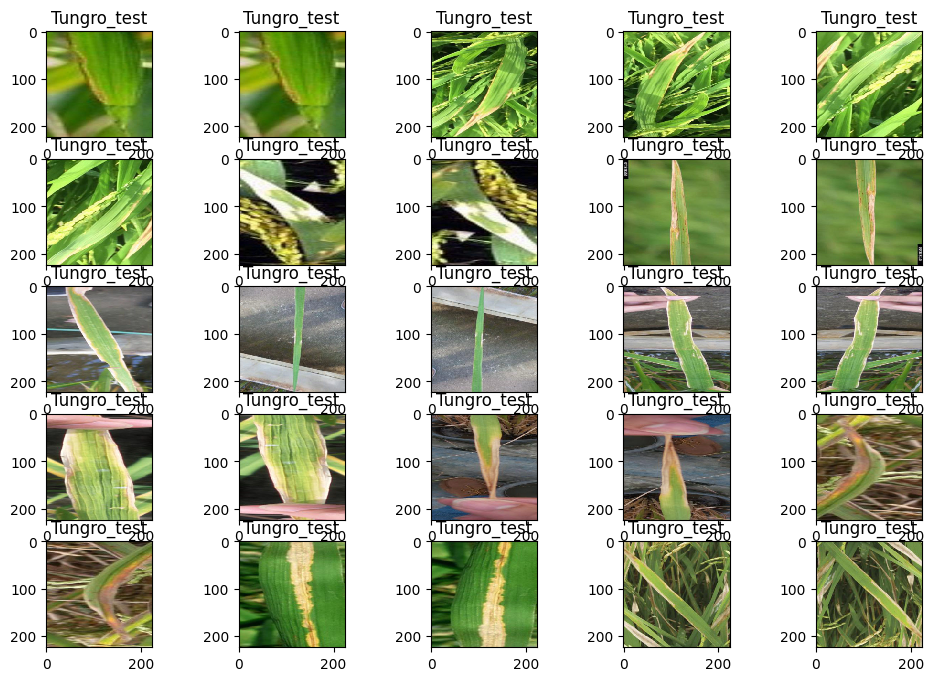

In [10]:
w = 40
h = 30
fig = plt.figure(figsize=(12, 8))
columns = 5
rows = 5

for i in range(1, columns * rows + 1):
    ax = fig.add_subplot(rows, columns, i)
    if test_labels[i] == 0:
        ax.title.set_text('BacterialBlight.test')
    elif test_labels[i] == 1:
        ax.title.set_text('blast_test')
    elif test_labels[i] == 2:
        ax.title.set_text('brownspot_test')
    elif test_labels[i] == 3:
        ax.title.set_text('Tungro_test')
    plt.imshow(test_images[i], interpolation='nearest')
plt.show()

In [11]:
def list_to_array_train(train_images,train_labels):
  return np.array(train_images),np.array(train_labels)

X_train,y_train=list_to_array_train(train_images,train_labels)


def list_to_array_test(test_images,test_labels):
  return np.array(test_images),np.array(test_labels)


X_test,y_test=list_to_array_test(test_images,test_labels)


In [12]:
print(X_train.shape)
print("*"*20)
print(y_train.shape)
print("*"*20)
print(X_test.shape)
print(y_test.shape)

(5041, 224, 224, 3)
********************
(5041,)
********************
(891, 224, 224, 3)
(891,)


In [13]:
def keras_to_categorical(y_train,y_test):
  return to_categorical(y_train),to_categorical(y_test)
y_train1=y_train
y_test1=y_test
y_train,y_test=keras_to_categorical(y_train,y_test)

In [14]:
y_train1.shape,y_test1.shape

((5041,), (891,))

In [15]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  d1=Dense(units=256,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=4,kernel_initializer="glorot_uniform", activation='softmax')(d1)
  output = Model(inputs =VGG_model.input, outputs =d2)
  #output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model16=model_vgg16()

In [16]:
model16.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])

In [17]:
history = model16.fit(X_train, y_train, validation_split=0.2,epochs= 2, batch_size= 5, verbose=1,validation_data=(X_test,y_test))

Epoch 1/2
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 1015s 1s/step - accuracy: 0.6057 - loss: 0.1911 - val_accuracy: 0.6936 - val_loss: 0.1499
Epoch 2/2
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 792s 785ms/step - accuracy: 0.7226 - loss: 0.1369 - val_accuracy: 0.8350 - val_loss: 0.0793


In [18]:
def model_vgg19():
  VGG19_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG19_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG19_model.output)
  d1=Dense(units=256,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=4,kernel_initializer="glorot_uniform", activation='softmax')(d1)
  output = Model(inputs =VGG19_model.input, outputs =d2)
  #output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model19=model_vgg19()

In [19]:
model19.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])

In [20]:
history = model19.fit(X_train, y_train, validation_split=0.2,
                    epochs= 2, batch_size= 5, verbose=1,validation_data=(X_test,y_test))

Epoch 1/2
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 1178s 1s/step - accuracy: 0.4607 - loss: 0.2623 - val_accuracy: 0.8092 - val_loss: 0.0928
Epoch 2/2
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 1011s 1s/step - accuracy: 0.7364 - loss: 0.1288 - val_accuracy: 0.6869 - val_loss: 0.1550


In [21]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  ##d1=Dense(units=256,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='relu')(feature)
  ##d2=Dense(units=2,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='softmax')(d1)
  #output = Model(inputs =VGG_model.input, outputs =d2)
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_16=model_vgg16()

In [22]:
model_FE_16.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])
train_feature_16=model_FE_16.predict(X_train)
test_feature_16=model_FE_16.predict(X_test)

158/158 ━━━━━━━━━━━━━━━━━━━━ 723s 5s/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step


In [25]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train = y_train.argmax(axis=1)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = y_test.argmax(axis=1)

# Optional: Standardize features (mean=0, variance=1) for better SVM performance
scaler = StandardScaler()
train_feature_16 = scaler.fit_transform(train_feature_16)
test_feature_16 = scaler.transform(test_feature_16)

# Instantiate the SVM classifier
svm_clf = SVC(kernel='linear')  # You can also try 'rbf', 'poly', etc.

# Fit the classifier on the training data
svm_clf.fit(train_feature_16, y_train)

# Predict on the training data
train_pred = svm_clf.predict(train_feature_16)

# Predict on the test data
test_pred = svm_clf.predict(test_feature_16)

# Calculate and print the accuracy scores
print("Train Accuracy Score:", accuracy_score(train_pred, y_train))
print("Test Accuracy Score:", accuracy_score(test_pred, y_test))


Train Accuracy Score: 1.0
Test Accuracy Score: 1.0


In [26]:
def model_vgg19():
  VGG_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  ##d1=Dense(units=256,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='relu')(feature)
  ##d2=Dense(units=2,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='softmax')(d1)
  #output = Model(inputs =VGG_model.input, outputs =d2)
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_19=model_vgg19()

In [27]:
model_FE_19.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])
train_feature_19=model_FE_19.predict(X_train)
test_feature_19=model_FE_19.predict(X_test)

158/158 ━━━━━━━━━━━━━━━━━━━━ 856s 5s/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 151s 5s/step


In [28]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train = y_train.argmax(axis=1)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = y_test.argmax(axis=1)

# Optional: Standardize features (mean=0, variance=1) for better SVM performance
scaler = StandardScaler()
train_feature_19 = scaler.fit_transform(train_feature_19)
test_feature_19 = scaler.transform(test_feature_19)

# Instantiate the SVM classifier
svm_clf = SVC(kernel='linear')  # You can also try 'rbf', 'poly', etc.

# Fit the classifier on the training data
svm_clf.fit(train_feature_16, y_train)

# Predict on the training data
train_pred = svm_clf.predict(train_feature_19)

# Predict on the test data
test_pred = svm_clf.predict(test_feature_19)

# Calculate and print the accuracy scores
print("Train Accuracy Score:", accuracy_score(train_pred, y_train))
print("Test Accuracy Score:", accuracy_score(test_pred, y_test))


Train Accuracy Score: 0.894267010513787
Test Accuracy Score: 0.8945005611672279


In [29]:
final_train=np.hstack((train_feature_16,train_feature_19))
final_test=np.hstack((test_feature_16,test_feature_19))

In [31]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train = y_train.argmax(axis=1)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = y_test.argmax(axis=1)


# Instantiate the SVM classifier
svm_clf = SVC(kernel='linear')  # You can also try 'rbf', 'poly', etc.

# Fit the classifier on the training data
svm_clf.fit(final_train, y_train)

# Predict on the training data
train_pred = svm_clf.predict(final_train)

# Predict on the test data
test_pred = svm_clf.predict(final_test)

# Calculate and print the accuracy scores
print("Train Accuracy Score:", accuracy_score(train_pred, y_train))
print("Test Accuracy Score:", accuracy_score(test_pred, y_test))


Train Accuracy Score: 1.0
Test Accuracy Score: 0.9966329966329966
